In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [2]:
VideoDetails = pd.read_csv('VideoDetails.csv')
Registration = pd.read_csv('Registration.csv')
AppUninstalled = pd.read_csv('AppUninstalled.csv')
UTMVisited = pd.read_csv('UTMVisited.csv')
VideoStarted = pd.read_csv('VideoStarted.csv')
AppLaunched = pd.read_csv('AppLaunched.csv')

In [3]:
VideoDetails['ProgramType'] = VideoDetails['ProgramType'].apply(lambda x : x.strip())
VideoStarted['ProgramType'] = VideoStarted['ProgramType'].apply(lambda x : x.strip())

In [4]:
VideoDetails['ProgramType'] = VideoDetails['ProgramType'].astype(object).replace("  ", "UNKNOWN Type")
VideoStarted['ProgramType'] = VideoStarted['ProgramType'].astype(object).replace("  ", "UNKNOWN Type")
VideoDetails['ProgramType'] = VideoDetails['ProgramType'].astype(object).replace("", "UNKNOWN Type")
VideoStarted['ProgramType'] = VideoStarted['ProgramType'].astype(object).replace("", "UNKNOWN Type")

In [5]:
VideoDetails['Genre'] = VideoDetails['Genre'].astype(object).replace("  ", "UNKNOWN Genre")
VideoStarted['Genre'] = VideoStarted['Genre'].astype(object).replace("  ", "UNKNOWN Genre")

In [6]:
VideoStarted['Genre'].unique()

array([' Romance ', ' Anime ', ' Drama ', ' Comedy ', ' Martial Sports ',
       ' Variety ', ' Sports Magazine ', ' Action ', ' Tennis / Squash ',
       ' TV Shows (General) ', ' Horror ', ' Other Sports (General) ',
       ' Automotive ', ' Fashion ', ' Family ', ' Reality ', ' Thriller ',
       ' Crime ', ' Music ', ' Entertainment News ', ' Reality Show ',
       ' Football ', ' Others ', ' Entertainment ', 'UNKNOWN Genre',
       ' Mystery ', ' Game Show ', ' Motor Sports ', ' Animation ',
       ' Award Show ', ' Documentary ', ' Cooking ', ' Food ',
       ' Current Affairs / General ', ' Travel ', ' Concerts ',
       ' Series ', ' Special Event ', ' Wrestling ', ' Adventure ',
       ' Talk Show ', ' General ', ' Golf ', ' Horror / Supernatural ',
       ' Team Sports (Excl. Football) ', ' Badminton ', ' Athletics ',
       ' Unknown ', ' Musical / Opera ', ' Hockey ', ' Religious ',
       ' Equestrian '], dtype=object)

In [7]:
data = pd.read_csv('FinalData.csv')
data.shape

C:\Users\Satyashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(466124, 3)

In [8]:
data.head()

,UserId,Status,Uninstall
0,d168e2b924124feaad13eae44a68fce9,Completed,0
1,deed7490952a6746610ee2ee9fd219b7,Completed,1
2,13d9f55e297d7d9c219fbe9085e1006c,Completed,1
3,fccc2c0abf5afabf242a70df7b4c9e69,Completed,1
4,93b755f457a9d3e14a06ebd843583560,Not Completed,1


In [9]:
data['Status'] = data['Status'].map({'Completed': 1, 'Not Completed': 0})

In [10]:
table = pd.pivot_table(VideoStarted[["UserId", "Genre"]].append(VideoDetails[["UserId", "Genre"]]), index = ['UserId'], columns=['Genre'], aggfunc=len)

In [11]:
data = pd.merge(data, table, on=['UserId'], how = 'left')
data.shape

(466124, 56)

In [12]:
table = pd.pivot_table(VideoStarted[["UserId", "ProgramType"]].append(VideoDetails[["UserId", "ProgramType"]]), index = ['UserId'], columns=['ProgramType'], aggfunc=len)

In [13]:
data = pd.merge(data, table, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Thriller,Travel,Unknown,Variety,Wrestling,UNKNOWN Genre,Channels,Movies,TV Shows,UNKNOWN Type
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


In [14]:
NumberOfAdCampaignInteracted = pd.DataFrame(UTMVisited['UserId'].value_counts())
NumberOfAdCampaignInteracted.rename(columns = {"UserId": "NumberOfAdCampaignInteracted"}, inplace = True)
UserId = NumberOfAdCampaignInteracted.index
NumberOfAdCampaignInteracted['UserId'] = UserId
NumberOfAdCampaignInteracted = NumberOfAdCampaignInteracted.reset_index(drop=True)
NumberOfAdCampaignInteracted.head()

,NumberOfAdCampaignInteracted,UserId
0,2563,78f893c7638ae6da111483154ea8ae99
1,2276,af7956df6077143592cb1b4f43c41da9
2,2070,52665f1c3939fc8759f1b4093e6a2acd
3,1595,003385ae5722ef2280de879a62c7cc8e
4,1440,e46a7f614781f07f086b92380c8770f1


In [15]:
data = pd.merge(data, NumberOfAdCampaignInteracted, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Travel,Unknown,Variety,Wrestling,UNKNOWN Genre,Channels,Movies,TV Shows,UNKNOWN Type,NumberOfAdCampaignInteracted
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


In [16]:
NumberOfAppLaunches = pd.DataFrame(AppLaunched['UserId'].value_counts())
NumberOfAppLaunches.rename(columns = {"UserId": "NumberOfAppLaunches"}, inplace = True)
UserId = NumberOfAppLaunches.index
NumberOfAppLaunches['UserId'] = UserId
NumberOfAppLaunches = NumberOfAppLaunches.reset_index(drop=True)
NumberOfAppLaunches.head()

,NumberOfAppLaunches,UserId
0,14413,d2180a6a4ce12d76abd8e75f395c36a1
1,14208,e3dfb23d880f33e829e8ac16dc227a26
2,12059,ad248c30f57d2666a94f84e9318b0af6
3,10645,20ea08225242faf84b86209e1ae96f9f
4,10312,f19338449c288876cbaba92659687c14


In [17]:
data = pd.merge(data, NumberOfAppLaunches, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Unknown,Variety,Wrestling,UNKNOWN Genre,Channels,Movies,TV Shows,UNKNOWN Type,NumberOfAdCampaignInteracted,NumberOfAppLaunches
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,5.0
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,19.0
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,3.0
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,1.0


In [18]:
data.shape

(466124, 62)

In [19]:
VideoDetails['Sec_Of_Day'] = VideoDetails['Minute_Of_Day'] * 60 + VideoDetails['Second']
VideoStarted['Sec_Of_Day'] = VideoStarted['Minute_Of_Day'] * 60 + VideoStarted['Second']
Registration['Sec_Of_Day'] = Registration['Minute_Of_Day'] * 60 + Registration['Second']
AppLaunched['Sec_Of_Day'] = AppLaunched['Minute_Of_Day'] * 60 + AppLaunched['Second']
AppUninstalled['Sec_Of_Day'] = AppUninstalled['Minute_Of_Day'] * 60 + AppUninstalled['Second']
UTMVisited['Sec_Of_Day'] = UTMVisited['Minute_Of_Day'] * 60 + UTMVisited['Second']

In [20]:
#data1 = VideoDetails[['UserId', 'Sec_Of_Day']].groupby('UserId').sum().reset_index()
data1 = pd.DataFrame(VideoDetails[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']]
                     .append(VideoStarted[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(Registration[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(AppLaunched[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(AppUninstalled[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .append(UTMVisited[['UserId', 'Date', 'Sec_Of_Day', 'Country', 'State', 'Device', 'OS']])
                     .groupby('UserId').last().reset_index())
data1.shape

(466124, 7)

In [21]:
data1.rename(columns = {'Date': 'Last_Date', 'Sec_Of_Day': 'Last_Sec_Of_Day', 'Device': 'Last_Device', 'OS': 'Last_OS'}, inplace = True)
data1.head()

,UserId,Last_Date,Last_Sec_Of_Day,Country,State,Last_Device,Last_OS
0,0000146e97c32d369268e5ba5f4b907c,20170228,54136,1,36,1,1
1,0000193a728fd00b6cff91b8840bbf8d,20170209,7380,14,1,1,1
2,00001e3213a2159ed06f1db689c54fbb,20170213,85648,40,33,1,1
3,00004010d92c2f13b824237bc323d58b,20170430,77992,40,33,2,1
4,00004dd911aafdc3f3cd64a490bd56f1,20170506,51804,1,35,1,1


In [22]:
data = pd.merge(data, data1, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,TV Shows,UNKNOWN Type,NumberOfAdCampaignInteracted,NumberOfAppLaunches,Last_Date,Last_Sec_Of_Day,Country,State,Last_Device,Last_OS
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,5.0,20170305,5272,1,35,1,2
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,20170106,216,40,7,1,1
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,NaN,NaN,19.0,20170513,10380,1,35,1,2
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,3.0,20170116,10680,1,39,1,1
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,20170107,8700,255,0,1,1


In [23]:
data1 = pd.DataFrame(VideoDetails[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']]
                     .append(VideoStarted[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']])
                     .append(Registration[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']])
                     .append(AppLaunched[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']])
                     .append(AppUninstalled[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']])
                     .append(UTMVisited[['UserId', 'Date', 'Sec_Of_Day', 'Device', 'OS']])
                     .groupby('UserId').first().reset_index())
data1.shape

(466124, 5)

In [24]:
data1.rename(columns = {'Date': 'First_Date', 'Sec_Of_Day': 'First_Sec_Of_Day', 'Device': 'First_Device', 'OS': 'First_OS'}, inplace = True)
data1.head()

,UserId,First_Date,First_Sec_Of_Day,First_Device,First_OS
0,0000146e97c32d369268e5ba5f4b907c,20170223,42372,1,1
1,0000193a728fd00b6cff91b8840bbf8d,20170207,584,1,1
2,00001e3213a2159ed06f1db689c54fbb,20170214,312,1,1
3,00004010d92c2f13b824237bc323d58b,20170430,78020,2,1
4,00004dd911aafdc3f3cd64a490bd56f1,20170506,51804,1,1


In [25]:
data = pd.merge(data, data1, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Last_Date,Last_Sec_Of_Day,Country,State,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20170305,5272,1,35,1,2,20170106,288,1,2
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,20170106,216,40,7,1,1,20170106,392,1,1
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20170513,10380,1,35,1,2,20170106,2540,1,2
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20170116,10680,1,39,1,1,20170108,6196,1,1
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,20170107,8700,255,0,1,1,20170106,84,1,1


In [26]:
type(data['Last_Date'].head()[0])

numpy.int64

In [27]:
date = data['Last_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
date.head()

0   2017-03-05
1   2017-01-06
2   2017-05-13
3   2017-01-16
4   2017-01-07
Name: Last_Date, dtype: datetime64[ns]

In [28]:
data['Last_Date'] = data['Last_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data['First_Date'] = data['First_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Last_Date,Last_Sec_Of_Day,Country,State,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-03-05,5272,1,35,1,2,2017-01-06,288,1,2
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-01-06,216,40,7,1,1,2017-01-06,392,1,1
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-05-13,10380,1,35,1,2,2017-01-06,2540,1,2
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-01-16,10680,1,39,1,1,2017-01-08,6196,1,1
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-01-07,8700,255,0,1,1,2017-01-06,84,1,1


In [29]:
data['Day_between_First_and_Last'] = data['Last_Date'] - data['First_Date']
data['Day_between_First_and_Last'].head()

0    58 days
1     0 days
2   127 days
3     8 days
4     1 days
Name: Day_between_First_and_Last, dtype: timedelta64[ns]

In [30]:
data['Day_between_First_and_Last'] = data['Day_between_First_and_Last'].apply(lambda x : str(x)[:-14])
data['Day_between_First_and_Last'].head()

0     58
1      0
2    127
3      8
4      1
Name: Day_between_First_and_Last, dtype: object

In [31]:
data['Day_between_First_and_Last'] = data['Day_between_First_and_Last'].astype(int)

In [32]:
data['Day_between_First_and_Last'].head()

0     58
1      0
2    127
3      8
4      1
Name: Day_between_First_and_Last, dtype: int32

In [33]:
Total_Count = pd.DataFrame(VideoDetails[['UserId', 'Date']]
                     .append(VideoStarted[['UserId', 'Date']])
                     .append(Registration[['UserId', 'Date']])
                     .append(AppLaunched[['UserId', 'Date']])
                     .append(AppUninstalled[['UserId', 'Date']])
                     .append(UTMVisited[['UserId', 'Date']])
                     .groupby('UserId').count().reset_index())


In [34]:
Total_Count.head()
Total_Count.rename(columns = {'Date': 'Count_of_Visits'}, inplace = True)


In [35]:
data = pd.merge(data, Total_Count, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Country,State,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS,Day_between_First_and_Last,Count_of_Visits
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,35,1,2,2017-01-06,288,1,2,58,13
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40,7,1,1,2017-01-06,392,1,1,0,5
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,35,1,2,2017-01-06,2540,1,2,127,69
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,39,1,1,2017-01-08,6196,1,1,8,17
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,255,0,1,1,2017-01-06,84,1,1,1,13


In [36]:
print(data.columns)

Index(['UserId', 'Status', 'Uninstall', ' Action ', ' Adventure ',
       ' Animation ', ' Anime ', ' Athletics ', ' Automotive ', ' Award Show ',
       ' Badminton ', ' Comedy ', ' Concerts ', ' Cooking ', ' Crime ',
       ' Current Affairs / General ', ' Documentary ', ' Drama ',
       ' Entertainment ', ' Entertainment News ', ' Equestrian ', ' Family ',
       ' Fashion ', ' Food ', ' Football ', ' Game Show ', ' General ',
       ' Golf ', ' Hockey ', ' Horror ', ' Horror / Supernatural ',
       ' Martial Sports ', ' Motor Sports ', ' Music ', ' Musical / Opera ',
       ' Mystery ', ' Other Sports (General) ', ' Others ',
       ' Others (Documentary) ', ' Reality ', ' Reality Show ', ' Religious ',
       ' Romance ', ' Series ', ' Special Event ', ' Sports Magazine ',
       ' TV Shows (General) ', ' Talk Show ', ' Team Sports (Excl. Football) ',
       ' Tennis / Squash ', ' Thriller ', ' Travel ', ' Unknown ', ' Variety ',
       ' Wrestling ', 'UNKNOWN Genre', 'Channels'

In [37]:
data['Avg_time_bw_visits'] = (((data['Day_between_First_and_Last'] - 2) * 24 * 60 * 60) 
                            + (86400-data['First_Sec_Of_Day']) 
                            + data['Last_Sec_Of_Day'])/data['Count_of_Visits']
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,State,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS,Day_between_First_and_Last,Count_of_Visits,Avg_time_bw_visits
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,1,2,2017-01-06,288,1,2,58,13,379214.153846
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1,1,2017-01-06,392,1,1,0,5,-17315.200000
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,1,2,2017-01-06,2540,1,2,127,69,157887.536232
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,1,1,2017-01-08,6196,1,1,8,17,35840.235294
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,2017-01-06,84,1,1,1,13,662.769231


In [38]:
data['Avg_time_bw_visits'] = data['Avg_time_bw_visits'].apply(lambda x : x if x > 0 else 0)
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,State,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS,Day_between_First_and_Last,Count_of_Visits,Avg_time_bw_visits
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,1,2,2017-01-06,288,1,2,58,13,379214.153846
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7,1,1,2017-01-06,392,1,1,0,5,0.000000
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,1,2,2017-01-06,2540,1,2,127,69,157887.536232
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,1,1,2017-01-08,6196,1,1,8,17,35840.235294
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,2017-01-06,84,1,1,1,13,662.769231


In [39]:
max(data['First_Date'])

Timestamp('2017-06-12 00:00:00')

In [40]:
last_date = pd.to_datetime(str(20170612), format='%Y%m%d')
last_date

Timestamp('2017-06-12 00:00:00')

In [41]:
data['Dormant'] = data['Last_Date'].apply(lambda x : (last_date - x)/np.timedelta64(1, 'D'))

In [42]:
data['Dormant'].head()

0     99.0
1    157.0
2     30.0
3    147.0
4    156.0
Name: Dormant, dtype: float64

In [43]:
data['Dormant'] = data['Dormant'].apply(lambda x : 1 if x > 15 else 0)
data['Dormant'].head()

0    1
1    1
2    1
3    1
4    1
Name: Dormant, dtype: int64

In [44]:
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Last_Device,Last_OS,First_Date,First_Sec_Of_Day,First_Device,First_OS,Day_between_First_and_Last,Count_of_Visits,Avg_time_bw_visits,Dormant
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,2017-01-06,288,1,2,58,13,379214.153846,1
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2017-01-06,392,1,1,0,5,0.000000,1
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,2017-01-06,2540,1,2,127,69,157887.536232,1
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2017-01-08,6196,1,1,8,17,35840.235294,1
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2017-01-06,84,1,1,1,13,662.769231,1


In [45]:
data.shape

(466124, 76)

In [46]:
VideoStarted['Quater']= VideoStarted['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))

In [47]:
table = pd.pivot_table(VideoStarted[["UserId", "Quater"]], index = ['UserId'], columns=['Quater'], aggfunc=len)

In [48]:
table = table.rename(columns = {1:"Q1_Video_Watched",2:"Q2_Video_Watched",3:"Q3_Video_Watched",4:"Q4_Video_Watched"})
table.head()

Quater,Q1_Video_Watched,Q2_Video_Watched,Q3_Video_Watched,Q4_Video_Watched
UserId,,,,
0000146e97c32d369268e5ba5f4b907c,NaN,1.0,NaN,NaN
00004010d92c2f13b824237bc323d58b,NaN,NaN,NaN,2.0
000076c7bbdf7e4568777134cc4bec56,2.0,1.0,NaN,6.0
0000e560394fce891dcf80218793d181,NaN,NaN,3.0,NaN
000111507a214a26efe459cb2807cd78,NaN,NaN,NaN,3.0


In [49]:
data = pd.merge(data, table, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,First_Device,First_OS,Day_between_First_and_Last,Count_of_Visits,Avg_time_bw_visits,Dormant,Q1_Video_Watched,Q2_Video_Watched,Q3_Video_Watched,Q4_Video_Watched
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,58,13,379214.153846,1,NaN,NaN,1.0,NaN
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,5,0.000000,1,1.0,NaN,NaN,NaN
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,127,69,157887.536232,1,5.0,1.0,NaN,4.0
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,8,17,35840.235294,1,3.0,NaN,NaN,NaN
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,13,662.769231,1,NaN,NaN,NaN,NaN


In [50]:
VideoDetails['Quater']= VideoDetails['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))
AppLaunched['Quater']= AppLaunched['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))
AppUninstalled['Quater']= AppUninstalled['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))    
Registration['Quater']= Registration['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))    
UTMVisited['Quater']= UTMVisited['Sec_Of_Day'].apply(lambda x : 1 if x <= 21600 else (2 if x<=43200 else(3 if x <= 64800 else 4)))    

In [51]:
table = pd.pivot_table(VideoDetails[["UserId", "Quater"]].append(AppLaunched[["UserId", "Quater"]]).append(AppUninstalled[["UserId", "Quater"]]).append(Registration[["UserId", "Quater"]]).append(UTMVisited[["UserId", "Quater"]]), index = ['UserId'], columns=['Quater'], aggfunc=len)

In [52]:
table = table.rename(columns = {1:"Q1_Activity",2:"Q2_Activity",3:"Q3_Activityd",4:"Q4_Activity"})

In [53]:
data = pd.merge(data, table, on=['UserId'], how = 'left')

In [54]:
data = data.rename(columns = {'Q3_Activityd':"Q3_Activity"})

In [55]:
AppUninstalled_un=pd.DataFrame()
AppUninstalled_un['UserId']=AppUninstalled['UserId']
AppUninstalled_un['Uninstalled']=1

In [56]:
AppUninstalled_un=AppUninstalled_un.groupby(['UserId']).sum()

In [57]:
data = pd.merge(data, AppUninstalled_un, on=['UserId'], how = 'left')
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Dormant,Q1_Video_Watched,Q2_Video_Watched,Q3_Video_Watched,Q4_Video_Watched,Q1_Activity,Q2_Activity,Q3_Activity,Q4_Activity,Uninstalled
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1.0,NaN,4.0,3.0,3.0,2.0,NaN
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5.0,1.0,NaN,4.0,9.0,13.0,6.0,31.0,1.0
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3.0,NaN,NaN,NaN,13.0,NaN,NaN,1.0,1.0
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,1.0


In [58]:
data['Reinstall']=data['Uninstalled']-1

In [59]:
data = data.rename(columns = {'Uninstalled':"No_of_Uninstalled"})

In [60]:
data['No_of_Uninstalled'].fillna(0 ,inplace=True )

In [61]:
data1 = pd.DataFrame(VideoDetails[['VideoId', 'Genre', 'ProgramType']]
                     .append(VideoStarted[['VideoId', 'Genre', 'ProgramType']])
                     .groupby('Genre').count().reset_index())

In [62]:
table = pd.pivot_table(VideoDetails[['VideoId', 'Genre']]
                       .append(VideoStarted[['VideoId', 'Genre']])
                       , index = ['VideoId'], columns=['Genre'], aggfunc=len)

In [63]:
data2 = pd.DataFrame(table.count())

In [64]:
data2 = data2.rename(columns = {0:"VideoCountGenre"})

In [65]:
data2.iloc[1]['VideoCountGenre']
data2.reset_index(inplace=True)

In [66]:
data2.head()

,Genre,VideoCountGenre
0,Action,253
1,Adventure,7
2,Animation,50
3,Anime,1122
4,Athletics,3


In [67]:
for count,ele in enumerate(data2['Genre']):    
    print(ele ,':',data2.iloc[count]['VideoCountGenre'])
    data[ele +'proportion']=data[ele]/data2.iloc[count]['VideoCountGenre']        

 Action  : 253
 Adventure  : 7
 Animation  : 50
 Anime  : 1122
 Athletics  : 3
 Automotive  : 32
 Award Show  : 4
 Badminton  : 4
 Comedy  : 386
 Concerts  : 5
 Cooking  : 5
 Crime  : 67
 Current Affairs / General  : 3
 Documentary  : 206
 Drama  : 2172
 Entertainment  : 20
 Entertainment News  : 3
 Equestrian  : 1
 Family  : 40
 Fashion  : 7
 Food  : 4
 Football  : 7
 Game Show  : 10
 General  : 4
 Golf  : 5
 Hockey  : 1
 Horror  : 273
 Horror / Supernatural  : 7
 Martial Sports  : 7
 Motor Sports  : 8
 Music  : 16
 Musical / Opera  : 1
 Mystery  : 17
 Other Sports (General)  : 10
 Others  : 46
 Others (Documentary)  : 1
 Reality  : 405
 Reality Show  : 120
 Religious  : 10
 Romance  : 427
 Series  : 9
 Special Event  : 4
 Sports Magazine  : 7
 TV Shows (General)  : 15
 Talk Show  : 4
 Team Sports (Excl. Football)  : 3
 Tennis / Squash  : 8
 Thriller  : 54
 Travel  : 3
 Unknown  : 8
 Variety  : 308
 Wrestling  : 4
UNKNOWN Genre : 18


In [68]:
table = pd.pivot_table(VideoDetails[['VideoId', 'ProgramType']]
                       .append(VideoStarted[['VideoId', 'ProgramType']])
                       , index = ['VideoId'], columns=['ProgramType'], aggfunc=len)

In [69]:
print(table.columns)
table.rename(columns = {'' : 'UNKNOWN Program Type'}, inplace = True)

Index(['Channels', 'Movies', 'TV Shows', 'UNKNOWN Type'], dtype='object', name='ProgramType')


In [70]:
print(data.columns)

Index(['UserId', 'Status', 'Uninstall', ' Action ', ' Adventure ',
       ' Animation ', ' Anime ', ' Athletics ', ' Automotive ', ' Award Show ',
       ...
       ' TV Shows (General) proportion', ' Talk Show proportion',
       ' Team Sports (Excl. Football) proportion',
       ' Tennis / Squash proportion', ' Thriller proportion',
       ' Travel proportion', ' Unknown proportion', ' Variety proportion',
       ' Wrestling proportion', 'UNKNOWN Genreproportion'],
      dtype='object', length=139)


In [71]:
data2 = pd.DataFrame(table.count())
data2 = data2.rename(columns = {0:"VideoCountProgramType"})
data2.iloc[1]['VideoCountProgramType']
data2.reset_index(inplace=True)

In [72]:
for count,ele in enumerate(data2['ProgramType']):
    print(ele ,':',data2.iloc[count]['VideoCountProgramType'])
    data[ele +'proportion']=data[ele]/data2.iloc[count]['VideoCountProgramType']

Channels : 87
Movies : 929
TV Shows : 5001
UNKNOWN Type : 5


In [73]:
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Thriller proportion,Travel proportion,Unknown proportion,Variety proportion,Wrestling proportion,UNKNOWN Genreproportion,Channelsproportion,Moviesproportion,TV Showsproportion,UNKNOWN Typeproportion
0,d168e2b924124feaad13eae44a68fce9,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001076,0.001200,NaN
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002153,NaN,NaN
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009598,NaN
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002400,NaN
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008611,NaN,NaN


In [74]:
data.fillna(int(255), inplace = True)

In [75]:
data.head()

,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Thriller proportion,Travel proportion,Unknown proportion,Variety proportion,Wrestling proportion,UNKNOWN Genreproportion,Channelsproportion,Moviesproportion,TV Showsproportion,UNKNOWN Typeproportion
0,d168e2b924124feaad13eae44a68fce9,1.0,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.001076,0.001200,255.0
1,deed7490952a6746610ee2ee9fd219b7,1.0,1,2.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.002153,255.000000,255.0
2,13d9f55e297d7d9c219fbe9085e1006c,1.0,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.009598,255.0
3,fccc2c0abf5afabf242a70df7b4c9e69,1.0,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.002400,255.0
4,93b755f457a9d3e14a06ebd843583560,0.0,1,8.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.008611,255.000000,255.0


In [76]:
#data.to_csv('FinalData1.csv', index = False)

In [77]:
from sklearn.decomposition import PCA

In [78]:
data.columns

Index(['UserId', 'Status', 'Uninstall', ' Action ', ' Adventure ',
       ' Animation ', ' Anime ', ' Athletics ', ' Automotive ', ' Award Show ',
       ...
       ' Thriller proportion', ' Travel proportion', ' Unknown proportion',
       ' Variety proportion', ' Wrestling proportion',
       'UNKNOWN Genreproportion', 'Channelsproportion', 'Moviesproportion',
       'TV Showsproportion', 'UNKNOWN Typeproportion'],
      dtype='object', length=143)

In [79]:
col = data.columns.tolist()
col = [c for c in col if c not in ["First_Date", "Last_Date", "UserId"]]

In [80]:
data[col].head()

,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,...,Thriller proportion,Travel proportion,Unknown proportion,Variety proportion,Wrestling proportion,UNKNOWN Genreproportion,Channelsproportion,Moviesproportion,TV Showsproportion,UNKNOWN Typeproportion
0,1.0,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.001076,0.001200,255.0
1,1.0,1,2.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.002153,255.000000,255.0
2,1.0,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.009598,255.0
3,1.0,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.002400,255.0
4,0.0,1,8.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.008611,255.000000,255.0


In [81]:
pca = PCA(n_components=2, random_state = 0)  
data1 = pca.fit_transform(data[col])

In [82]:
data1

array([[311678.12827896, -59119.4707387 ],
       [-67469.87225589, -65500.01861059],
       [ 90316.17099795, -55182.79247194],
       ...,
       [-67692.28214501, -27327.28098196],
       [-68069.03628742,  37644.91612643],
       [-67532.92934764, -54781.74236226]])

In [83]:
from sklearn.manifold import TSNE
import time

In [84]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data[col].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 466124 samples in 656.943s...
[t-SNE] Computed neighbors for 466124 samples in 342.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 466124
[t-SNE] Computed conditional probabilities for sample 2000 / 466124
[t-SNE] Computed conditional probabilities for sample 3000 / 466124
[t-SNE] Computed conditional probabilities for sample 4000 / 466124
[t-SNE] Computed conditional probabilities for sample 5000 / 466124
[t-SNE] Computed conditional probabilities for sample 6000 / 466124
[t-SNE] Computed conditional probabilities for sample 7000 / 466124
[t-SNE] Computed conditional probabilities for sample 8000 / 466124
[t-SNE] Computed conditional probabilities for sample 9000 / 466124
[t-SNE] Computed conditional probabilities for sample 10000 / 466124
[t-SNE] Computed conditional probabilities for sample 11000 / 466124
[t-SNE] Computed conditional probabilities for sample 12000 / 466124
[t-SNE] Computed conditional pr

[t-SNE] Computed conditional probabilities for sample 133000 / 466124
[t-SNE] Computed conditional probabilities for sample 134000 / 466124
[t-SNE] Computed conditional probabilities for sample 135000 / 466124
[t-SNE] Computed conditional probabilities for sample 136000 / 466124
[t-SNE] Computed conditional probabilities for sample 137000 / 466124
[t-SNE] Computed conditional probabilities for sample 138000 / 466124
[t-SNE] Computed conditional probabilities for sample 139000 / 466124
[t-SNE] Computed conditional probabilities for sample 140000 / 466124
[t-SNE] Computed conditional probabilities for sample 141000 / 466124
[t-SNE] Computed conditional probabilities for sample 142000 / 466124
[t-SNE] Computed conditional probabilities for sample 143000 / 466124
[t-SNE] Computed conditional probabilities for sample 144000 / 466124
[t-SNE] Computed conditional probabilities for sample 145000 / 466124
[t-SNE] Computed conditional probabilities for sample 146000 / 466124
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 254000 / 466124
[t-SNE] Computed conditional probabilities for sample 255000 / 466124
[t-SNE] Computed conditional probabilities for sample 256000 / 466124
[t-SNE] Computed conditional probabilities for sample 257000 / 466124
[t-SNE] Computed conditional probabilities for sample 258000 / 466124
[t-SNE] Computed conditional probabilities for sample 259000 / 466124
[t-SNE] Computed conditional probabilities for sample 260000 / 466124
[t-SNE] Computed conditional probabilities for sample 261000 / 466124
[t-SNE] Computed conditional probabilities for sample 262000 / 466124
[t-SNE] Computed conditional probabilities for sample 263000 / 466124
[t-SNE] Computed conditional probabilities for sample 264000 / 466124
[t-SNE] Computed conditional probabilities for sample 265000 / 466124
[t-SNE] Computed conditional probabilities for sample 266000 / 466124
[t-SNE] Computed conditional probabilities for sample 267000 / 466124
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 383000 / 466124
[t-SNE] Computed conditional probabilities for sample 384000 / 466124
[t-SNE] Computed conditional probabilities for sample 385000 / 466124
[t-SNE] Computed conditional probabilities for sample 386000 / 466124
[t-SNE] Computed conditional probabilities for sample 387000 / 466124
[t-SNE] Computed conditional probabilities for sample 388000 / 466124
[t-SNE] Computed conditional probabilities for sample 389000 / 466124
[t-SNE] Computed conditional probabilities for sample 390000 / 466124
[t-SNE] Computed conditional probabilities for sample 391000 / 466124
[t-SNE] Computed conditional probabilities for sample 392000 / 466124
[t-SNE] Computed conditional probabilities for sample 393000 / 466124
[t-SNE] Computed conditional probabilities for sample 394000 / 466124
[t-SNE] Computed conditional probabilities for sample 395000 / 466124
[t-SNE] Computed conditional probabilities for sample 396000 / 466124
[t-SNE] Computed con

In [85]:
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5043.41046667099 seconds


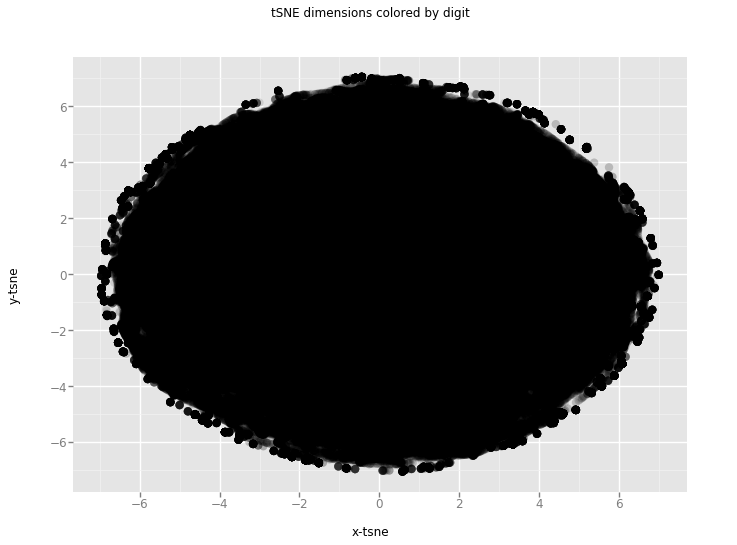

<ggplot: (-9223372036775968894)>

In [90]:
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt

df_tsne = data[col].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [93]:
time_start = time.time()
fashion_tsne = TSNE(random_state = 0).fit_transform(data[col])

t-SNE done! Time elapsed: {} seconds


AttributeError: 'NoneType' object has no attribute 'format'